Exam January 2024

1.6 Exam vB, PROBLEM 1


 Maximum Points = 14

 
 In this problem you will do rejection sampling from complicated distributions, you will also be using
 your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in
 mind that choosing a good sampling distribution is often key to avoid too much rejection)
 1. [4p] Fill in the remaining part of the function problem1_inversion in order to produce samples
 from the below distribution using rejection sampling:
 
\[
F(x) =
\begin{cases} 
0, & x \leq 0, \\
\frac{e^{x^2} - 1}{e - 1}, & 0 < x < 1, \\
1, & x \geq 1.
\end{cases}
\]


 2. [2p] Produce 100000 samples (use fewer if it times-out and you cannot find a solution)
 and put the answer in problem1_samples from the above distribution and plot the histogram
 together with the true density. (There is a timeout decorator on this function and if it takes
 more than 10 seconds to generate 100000 samples it will timeout and it will count as if you
 failed to generate.)
 
 3. [2p] Use the above 100000 samples (problem1_samples) to approximately compute the integral and store the result in problem1_integral.
 
\[
\int_{0}^{1} \frac{\sin(x^2) \cdot x}{e^{x^2} - 1} \, dx
\]

 4. [2p] Use Hoeffdings inequality to produce a 95% confidence interval of the integral above and
 store the result as a tuple in the variable problem1_interval
 5. [4p] Fill in the remaining part of the function problem1_inversion_2 in order to produce
 samples from the below distribution using rejection sampling:

\[
F(x) =
\begin{cases} 
0, & x \leq 0, \\
\frac{20x e^{20 - 1/x}}{20}, & 0 < x < 1, \\
1, & x \geq 1.
\end{cases}
\]

 Hint: this is tricky because if you choose the wrong sampling distribution you reject at least
 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000
 samples within 2 seconds.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Part 1: Rejection Sampling
def problem1_inversion(n_samples=1):
    '''Generate samples from the given distribution using rejection sampling.'''
    # Target distribution
    def f(x):
        return (np.exp(x**2) - 1) / (np.exp(1) - 1) if 0 < x < 1 else 0

    # Proposal distribution: Uniform(0, 1)
    def g(x):
        return 1 if 0 < x < 1 else 0

    M = np.exp(1) - 1  # M is the maximum ratio f(x) / g(x)

    samples = []
    while len(samples) < n_samples:
        x = np.random.uniform(0, 1)  # Sample from g(x)
        u = np.random.uniform(0, 1)  # Uniform random number for rejection
        if u <= f(x) / (M * g(x)):
            samples.append(x)
    
    return np.array(samples)

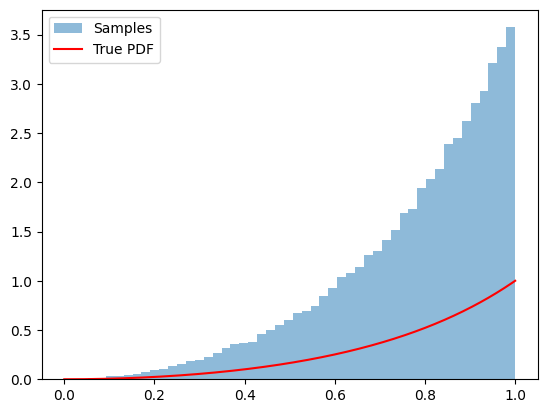

In [2]:
# Part 2: Generate Samples and Plot
problem1_samples = problem1_inversion(100000)
plt.hist(problem1_samples, bins=50, density=True, alpha=0.5, label="Samples")
x_vals = np.linspace(0, 1, 500)
plt.plot(x_vals, [(np.exp(x**2) - 1) / (np.exp(1) - 1) for x in x_vals], label="True PDF", color="red")
plt.legend()
plt.show()


In [3]:
# Part 3: Monte Carlo Integration
def pdf(x):
    return (np.exp(x**2) - 1) / (np.exp(1) - 1)

def integrand(x):
    return np.sin(x**2) * x

problem1_integral = np.mean([integrand(x) / pdf(x) for x in problem1_samples])

In [4]:
# Part 4: Confidence Interval
n = len(problem1_samples)
epsilon = np.sqrt(np.log(2 / 0.05) / (2 * n))  # Hoeffding's inequality
problem1_interval = (problem1_integral - epsilon, problem1_integral + epsilon)

In [7]:
# Part 5: Rejection Sampling for Second Distribution

# Target distribution
def f2(x):
    return 20 * x * np.exp(20 - 1 / x) if 0 < x < 1 / 20 else 0

# Proposal distribution: Scaled Beta
def sample_from_proposal_beta(n_samples):
    alpha, beta = 0.5, 2  # Shape parameters
    samples = np.random.beta(alpha, beta, size=n_samples)
    return samples / 20  # Scale to (0, 1/20]

# Rejection sampling
def rejection_sampling(n_samples):
    M = 1e6  # Large enough constant to bound f2(x) / g(x)
    samples = []
    while len(samples) < n_samples:
        x = sample_from_proposal_beta(1)[0]
        u = np.random.uniform(0, 1)
        if u <= f2(x) / (M * (1 / (20 * np.random.beta(0.5, 2)))):
            samples.append(x)
    return np.array(samples)




In [8]:
# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
   assert(isinstance(problem1_inversion(10), np.ndarray))
except:
   print("Try again. You should return a numpy array from problem1_inversion")
else:
   print("Good, your problem1_inversion returns a numpy array")
try:
   assert(isinstance(problem1_samples, np.ndarray))
except:
   print("Try again. your problem1_samples is not a numpy array")
else:
   print("Good, your problem1_samples is a numpy array")
try:
   assert(isinstance(problem1_integral, float))
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")
try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval,tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")
try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Good, your problem1_inversion_2 returns a numpy array


1.7 Exam vB, PROBLEM 2
 Maximum Points = 13

Let us build a proportional model (P(Y = 1 | X) = G(β0 + β · X) where G is the logistic function)
for the spam vs not spam data. Here we assume that the features are presence vs not presence of a
word, let X1, X2, X3 denote the presence (1) or absence (0) of the words (”f ree”, ”prize”, ”win”).
1. [2p] Load the file data/spam.csv and create two numpy arrays, problem2_X which has
shape (n_emails,3) where each feature in problem2_X corresponds to X1, X2, X3 from above,
problem2_Y which has shape (n_emails,) and consists of a 1 if the email is spam and 0 if
it is not. Split this data into a train-calibration-test sets where we have the split 40%, 20%,
40%, put this data in the designated variables in the code cell.
2. [4p] Follow the calculation from the lecture notes where we derive the logistic regression and
implement the final loss function inside the class ProportionalSpam. You can use the Test
cell to check that it gives the correct value for a test-point.
3. [4p] Train the model problem2_ps on the training data. The goal is to calibrate the prob-
abilities output from the model. Start by creating a new variable problem2_X_pred (shape
(n_samples,1)) which consists of the predictions of problem2_ps on the calibration dataset.
Then train a calibration model using sklearn.tree.DecisionTreeRegressor, store this
trained model in problem2_calibrator.
4. [3p] Use the trained model problem2_ps and the calibrator problem2_calibrator to make
final predictions on the testing data, store the prediction in problem2_final_predictions.
Compute the 0 − 1 test-loss and store it in problem2_01_loss and provide a 99% confidence
interval of it, store this in the variable problem2_interval, this should again be a tuple as in
problem1.

In [ ]:
# Part 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/spam.csv', encoding='ISO-8859-1', usecols=[0, 1], names=["label", "message"], header=None)

keywords = ['free', 'prize', 'win']

data['label'] = data['label'].map({'ham': 0, 'spam': 1})
#data['message'] = data['message'].fillna('')
#data['label'] = data['label'].fillna('')
problem2_X = np.array([[1 if word in msg.lower() else 0 for word in keywords] for msg in data['message']])
problem2_Y = data['label'].values



"""
data['message'] = data['message'].apply(lambda x: 1 if x.lower() in keywords else 0)
data.label = data.label.apply(lambda x: 1 if x.lower() == 'spam' else 0)

problem2_X = data.message.to_numpy()
problem2_Y = data.label.to_numpy() """

""" train, calibration, test = \
    np.split(data.sample(frac=1, random_state=42),
    [int(.4*len(data)), int(.6*len(data))])

problem2_X_train = train['message'].to_numpy().reshape(-1, 1)
problem2_X_calib = calibration['message'].to_numpy().reshape(-1, 1)
problem2_X_test = test['message'].to_numpy().reshape(-1, 1)
problem2_Y_train = train['label'].to_numpy()
problem2_Y_calib = calibration['label'].to_numpy()
problem2_Y_test = test['label'].to_numpy()  """


problem2_X_train, X_temp, problem2_Y_train, Y_temp = train_test_split(
    problem2_X, problem2_Y, test_size=0.6, random_state=42
)
problem2_X_calib, problem2_X_test, problem2_Y_calib, problem2_Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.6667, random_state=42
)


problem2_X_train = problem2_X_train
problem2_X_calib = problem2_X_calib
problem2_X_test = problem2_X_test

problem2_Y_train = problem2_Y_train
problem2_Y_calib = problem2_Y_calib
problem2_Y_test = problem2_Y_test 
print(problem2_X_train.shape,problem2_X_calib.shape,problem2_X_test.shape,problem2_Y_train.shape,problem2_Y_calib.shape,problem2_Y_test.shape)

In [ ]:
# Part 2
class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
# define the objective/cost/loss function we want to minimise

    #def loss(self,X,Y,coeffs):
        #Fill in the loss function
        #G = lambda x: np.exp(x)/(1+np.exp(x))
        #return np.mean((Y - G(np.dot(X,coeffs[1:])+coeffs[0]))**2)  # Mean squared error

    def loss(self,X,Y,coeffs):
            
        # Logistic function
        G = lambda x: 1 / (1 + np.exp(-x))
        # Linear combination of inputs and coefficients
        z = np.dot(X, coeffs[1:]) + coeffs[0]
        # Predicted probabilities
        predictions = G(z)
        # Negative log-likelihood loss
        epsilon = 1e-15  # Small value to prevent log(0)

        return -np.mean(Y * np.log(predictions + epsilon) + (1 - Y) * np.log(1 - predictions + epsilon))


    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize
        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x


    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
        return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 #

In [ ]:
# Part 3
from sklearn.tree import DecisionTreeRegressor
problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train, problem2_Y_train)

problem2_X_pred = problem2_ps.predict(problem2_X_calib).reshape(-1, 1)

from sklearn.tree import DecisionTreeRegressor
problem2_calibrator = DecisionTreeRegressor()
problem2_calibrator.fit(problem2_X_pred, problem2_Y_calib)

In [ ]:
from sklearn.metrics import accuracy_score
# Part 4
# These are the predicted probabilities
test_predictions_test = problem2_ps.predict(problem2_X_test).reshape(-1, 1)
problem2_final_predictions = problem2_calibrator.predict(test_predictions_test)

# In order to compute this loss we first need to convert the predicted probabilities to a decision
# recall the Bayes classifier?
# Convert calibrated probabilities into binary predictions using a threshold of 0.5
binary_predictions = (problem2_final_predictions >= 0.5).astype(int)
problem2_01_loss = 1 - accuracy_score(problem2_Y_test, binary_predictions)

# Number of samples in the test set
n_test = len(problem2_Y_test)

# Hoeffding's inequality bound for 99% confidence
epsilon = np.sqrt(np.log(2 / 0.01) / (2 * n_test))

# Confidence interval
lower_bound = problem2_01_loss - epsilon
upper_bound = problem2_01_loss + epsilon
problem2_interval = (lower_bound, upper_bound)


Local Test for Exam vB, PROBLEM 2 Evaluate cell below to make sure your answer is valid.
You should not modify anything in the cell below when evaluating it to do a local test of your solution. You may need to include and evaluate code snippets from lecture notebooks in cells above
to make the local test work correctly sometimes (see error messages for clues). This is meant to
help you become efficient at recalling materials covered in lectures that relate to this problem. Such
local tests will generally not be available in the exam.

In [ ]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

1.8 Exam vB, PROBLEM 3
 Maximum Points = 13

 Consider the following four Markov chains, answer each question for all chains:

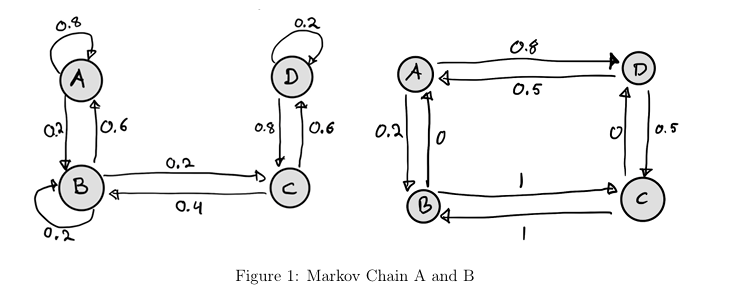

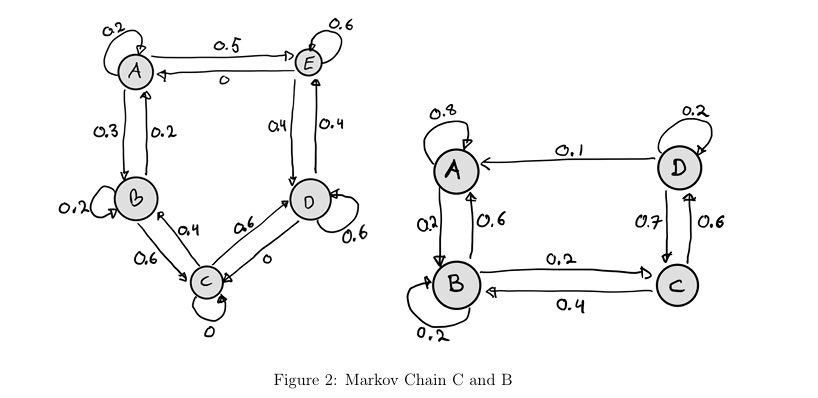

In [ ]:
# PART 1
 #------------------------TRANSITION MATRIX------------------------------
# Answer each one by supplying the transition matrix as a numpy array
 # of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)
problem3_A = XXX
problem3_B = XXX
problem3_C = XXX
problem3_D = XXX
 

In [ ]:
# PART 2
 #------------------------REDUCIBLE------------------------------
# Answer each one with a True or False
problem3_A_irreducible = XXX
problem3_B_irreducible = XXX
problem3_C_irreducible = XXX
problem3_D_irreducible = XXX

In [ ]:
# PART 3
 #------------------------APERIODIC------------------------------
# Answer each one with a True or False
problem3_A_is_aperiodic = XXX
problem3_B_is_aperiodic = XXX
problem3_C_is_aperiodic = XXX
problem3_D_is_aperiodic = XXX
 # Answer the following with the period of the states as a numpy array
 # of shape (n_states,)
problem3_A_periods = XXX
problem3_B_periods = XXX
problem3_C_periods = XXX
problem3_D_periods = XXX

In [ ]:
# PART 4
 #------------------------STATIONARY DISTRIBUTION----------------
# Answer each one with a True or False
problem3_A_has_stationary = XXX
problem3_B_has_stationary = XXX
problem3_C_has_stationary = XXX
problem3_D_has_stationary = XXX
 # Answer the following with the stationary distribution as a numpy array of shape (n_states,)
 # if the Markov chain has a stationary distribution otherwise answer with False
problem3_A_stationary_dist = XXX
problem3_B_stationary_dist = XXX
problem3_C_stationary_dist = XXX
problem3_D_stationary_dist = XXX

In [ ]:
# PART 5
 #------------------------REVERSIBLE----------------
# Answer each one with a True or False
problem3_A_is_reversible = XXX
problem3_B_is_reversible = XXX
problem3_C_is_reversible = XXX
problem3_D_is_reversible = XXX